In [76]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.patches import Polygon
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from matplotlib.colors import ListedColormap

In [ ]:
# read the dataset
df = pd.read_csv("cat_breeds_clean.csv")
df.head()

,Breed,Age_in_years,Age_in_months,Gender,Neutered_or_spayed,Body_length,Weight,Fur_colour_dominant,Fur_pattern,Eye_colour,Allowed_outdoor,Preferred_food,Owner_play_time_minutes,Sleep_time_hours,Country,Latitude,Longitude
0,Angora,0.25,3.0,female,False,19.0,2.0,white,solid,blue,FALSE,wet,46.0,16.0,France,43.296482,5.369780
1,Angora,0.33,4.0,male,False,19.0,2.5,white,solid,blue,FALSE,wet,48.0,16.0,France,43.611660,3.877710
2,Angora,0.50,NaN,NaN,False,20.0,2.8,what does it mean dominant?,solid,green,I never allow my kitty outside!!!!!,wet,41.0,11.0,France,44.837789,-0.579180
3,Ankora,0.50,NaN,NaN,False,21.0,3.0,white,dirty,blue,FALSE,wet,24.0,8.0,France,43.611660,3.877710
4,Angora,0.50,NaN,NaN,NaN,21.0,3.0,red/cream,tabby,green,FALSE,wet,51.0,10.0,france,48.864716,2.349014


In [78]:
# cleaning the data

# breed column
df["Breed"] = df["Breed"].replace({"Ankora": "Angora"})
df["Breed"] = df["Breed"].replace({"Angorra": "Angora"})
df["Breed"] = df["Breed"].replace({"My coon": "Maine coon"})
df["Breed"] = df["Breed"].replace({"Maine loon": "Maine coon"})
df["Breed"] = df["Breed"].replace({"maine coon": "Maine coon"})
df["Breed"] = df["Breed"].replace({"rack doll": "Ragdoll"})
df["Breed"] = df["Breed"].replace({"ragdoll": "Ragdoll"})
df["Breed"] = df["Breed"].replace({"wrack doll": "Ragdoll"})

# age_in_years and age_in_months
df["Age_in_months"] = df["Age_in_months"].fillna(df["Age_in_years"] * 12)
df = df[(df["Age_in_years"] >= 0) & (df["Age_in_months"] >= 0)]

# weight
df.loc[df["Weight"] > 20, "Weight"] = df["Weight"] / 100

# fur_colour_dominant
df["Fur_colour_dominant"] = df["Fur_colour_dominant"].replace({"what does it mean dominant?": None})

# fur_pattern
df["Fur_pattern"] = df["Fur_pattern"].replace({"dirty": None})

# eye_colour
df["Eye_colour"] = df["Eye_colour"].replace({"cute": None})

# allowed_outdoor
df["Allowed_outdoor"] = df["Allowed_outdoor"].replace({
    "FALSE": False,
    "TRUE": True
})

#preferred_food
df["Preferred_food"] = df["Preferred_food"].replace({"a lot of food": None})

# country
df["Country"] = df["Country"].replace({"france": "France"})
df["Country"] = df["Country"].replace({"Vive la France!": "France"})
df["Country"] = df["Country"].replace({"my country": None})
df["Country"] = df["Country"].replace({"where I live": None})




In [79]:
# remove missing data
df = df.dropna()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 741 entries, 0 to 1098
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Breed                    741 non-null    object 
 1   Age_in_years             741 non-null    float64
 2   Age_in_months            741 non-null    float64
 3   Gender                   741 non-null    object 
 4   Neutered_or_spayed       741 non-null    object 
 5   Body_length              741 non-null    float64
 6   Weight                   741 non-null    float64
 7   Fur_colour_dominant      741 non-null    object 
 8   Fur_pattern              741 non-null    object 
 9   Eye_colour               741 non-null    object 
 10  Allowed_outdoor          741 non-null    object 
 11  Preferred_food           741 non-null    object 
 12  Owner_play_time_minutes  741 non-null    float64
 13  Sleep_time_hours         741 non-null    float64
 14  Country                  741 n

In [81]:
df.describe()

,Age_in_years,Age_in_months,Body_length,Weight,Owner_play_time_minutes,Sleep_time_hours,Latitude,Longitude
count,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000
mean,4.962888,59.554224,45.113360,5.685911,22.326586,15.855601,44.218824,-64.880656
std,2.597240,31.167500,16.303891,2.279493,10.651796,2.549390,4.859433,44.588670
min,0.080000,1.000000,10.000000,0.500000,0.000000,10.000000,37.774930,-123.116226
25%,3.000000,36.000000,36.000000,4.000000,13.000000,14.000000,40.714270,-87.623177
50%,5.000000,60.000000,43.000000,5.300000,22.000000,16.000000,42.358430,-74.005970
75%,7.170000,86.000000,51.000000,7.240000,30.000000,18.000000,47.606210,-2.991573
max,11.250000,135.000000,102.000000,11.700000,60.000000,22.000000,53.800755,13.404954


In [108]:
# one-hot encode categorical values
# fur color to integers
fur_colors = df["Fur_colour_dominant"].unique()
fur_color_map = {color: i for i, color in enumerate(fur_colors)}
df["Fur_colour_num"] = df["Fur_colour_dominant"].map(fur_color_map)

# fur pattern to integers
fur_patterns = df["Fur_pattern"].unique()
fur_pattern_map = {pattern: i for i, pattern in enumerate(fur_patterns)}
df["Fur_pattern_num"] = df["Fur_pattern"].map(fur_pattern_map)

In [109]:
# form the design matrix
X = df[["Fur_colour_num", "Fur_pattern_num"]].values

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# form the target data vector
y = df["Breed"].map({"Angora": 0, "Ragdoll": 1, "Maine Coon": 2}).values

In [110]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

In [111]:
# breeds to integers
breed_to_int = {breed: i for i, breed in enumerate(df["Breed"].unique())}
y = df["Breed"].map(breed_to_int).values.astype(int)
num_classes = len(breed_to_int)


In [ ]:
# Logistic Regression Model (specifically multiclass logisitic regression)
class MultiClassLogisticRegression:
    def __init__(self, X, num_classes, learning_rate=0.1, n_iters=1000, random_seed=1):
        """
        X: training data (num_samples x num_features)
        num_classes: number of classes (e.g., number of breeds)
        learning_rate: step size for weight updates
        n_iters: number of iterations
        """
        self.lr = learning_rate
        self.n_iters = n_iters
        self.random_seed = random_seed
        self.num_classes = num_classes
        self.initialize(X)
        
    def initialize(self, X):
        np.random.seed(self.random_seed)
        # Weight matrix: num_features x num_classes
        self.W = np.random.normal(0, 0.01, size=(X.shape[1], self.num_classes))
        
    def softmax(self, X):
        z = np.dot(X, self.W)
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def predict_probability(self, X):
        return self.softmax(X)
    
    def predict(self, X):
        prob = self.predict_probability(X)
        return np.argmax(prob, axis=1)
    
    def loss(self, probs, y_one_hot):
        return -np.sum(y_one_hot * np.log(probs + 1e-8)) / y_one_hot.shape[0]
    
    def fit(self, X, y):
        """
        y: integer labels 0,1,...,num_classes-1
        """
        y_one_hot = np.zeros((X.shape[0], self.num_classes))
        y_one_hot[np.arange(X.shape[0]), y] = 1
        
        self.losses = []
        
        for i in range(self.n_iters):
            probs = self.predict_probability(X)
            gradient = np.dot(X.T, (probs - y_one_hot)) / X.shape[0]
            self.W -= self.lr * gradient
            self.losses.append(self.loss(probs, y_one_hot))


In [113]:
# Assuming X_train, y_train are prepared
model = MultiClassLogisticRegression(X_scaled, num_classes, learning_rate=0.1, n_iters=1000)
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)
accuracy = np.mean(y_pred == y)
loss_rate = 1 - accuracy
print("Accuracy:", accuracy)
print("Loss rate:", loss_rate)


Accuracy: 0.8663967611336032
Loss rate: 0.1336032388663968


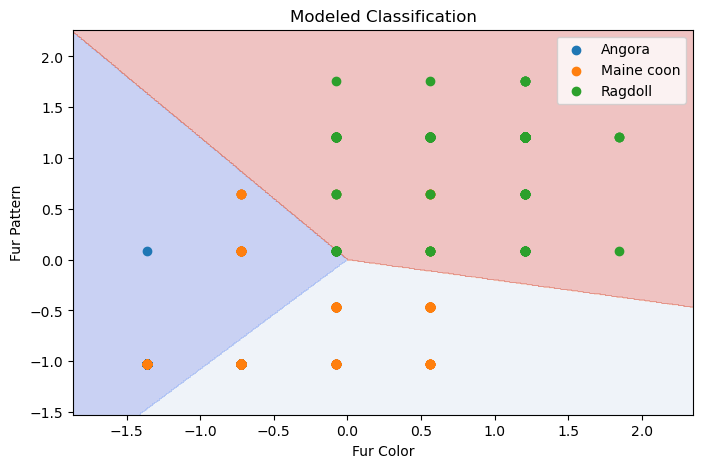

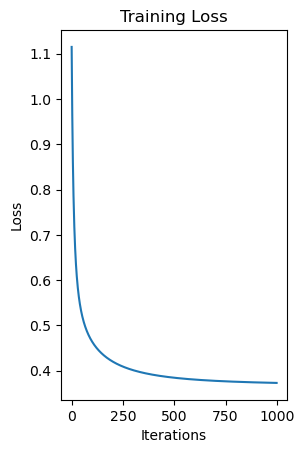

In [102]:
min_x, max_x = X_scaled[:,0].min() - 0.5, X_scaled[:,0].max() + 0.5
min_y, max_y = X_scaled[:,1].min() - 0.5, X_scaled[:,1].max() + 0.5
x1_span = np.linspace(min_x, max_x, 500)
x2_span = np.linspace(min_y, max_y, 500)
X1_span, X2_span = np.meshgrid(x1_span, x2_span)
X_grid = np.column_stack([X1_span.ravel(), X2_span.ravel()])

P_class = np.argmax(model.predict_probability(X_grid), axis=1).reshape(X1_span.shape)

plt.figure(figsize=(8,5))
plt.contourf(X1_span, X2_span, P_class, alpha=0.3, cmap='coolwarm')

for i, breed in enumerate(breed_to_int.keys()):
    plt.scatter(X_scaled[y==i, 0], X_scaled[y==i, 1], label=breed)

plt.xlabel("Fur Color")
plt.ylabel("Fur Pattern")
plt.title("Modeled Classification")
plt.legend()
plt.show()

# loss curve
plt.subplot(1,2,2)
plt.plot(model.losses)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title('Training Loss')
plt.show()

